# No 1 Artificial Neural Networks

* Dataset : https://www.tensorflow.org/datasets/catalog/horses_or_humans

Hyperparameter:
* Optimizer = Adam (learning rate=0.001)
* Loss = Cross Entropy
* Activation Function = ReLu
* Batch Size = 32
* Epoch = 50

Model:

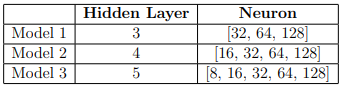

- Import Library

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Activation, Dense, Input, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

In [ ]:
builder = tfds.builder('horses_or_humans')
info = builder.info #Getting information

info

tfds.core.DatasetInfo(
    name='horses_or_humans',
    version=3.0.0,
    description='A large set of images of horses and humans.',
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=1283,
    splits={
        'test': 256,
        'train': 1027,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }""",
    redistribution_info=,
)

### a. Split data menjadi train, validation dan test set

In [ ]:
test_set, valid_set, train_set = tfds.load("horses_or_humans", 
                                           split=["train[:20%]", "train[20%:30%]", "train[30%:]"],
                                           as_supervised=True)

print("Train set size: ", len(train_set)) # Train set size:  719
print("Test set size: ", len(test_set))   # Test set size:  205
print("Valid set size: ", len(valid_set)) # Valid set size: 103

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteEPVITB/horses_or_humans-train.tfrecord


  0%|          | 0/1027 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteEPVITB/horses_or_humans-test.tfrecord


  0%|          | 0/256 [00:00<?, ? examples/s]

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.
Train set size:  719
Test set size:  205
Valid set size:  103


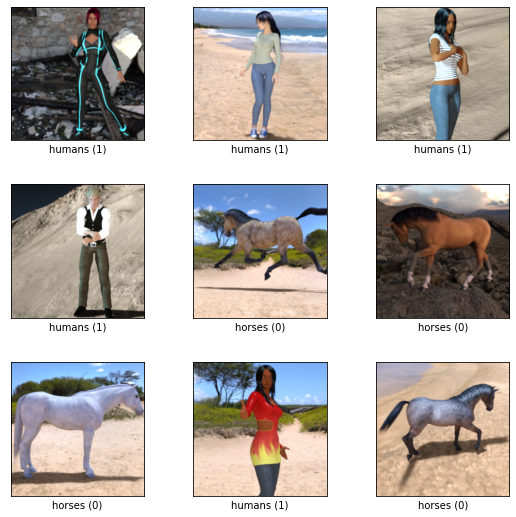

In [ ]:
fig = tfds.show_examples(train_set, info)

Data Preprocessing

In [ ]:
(test_images, test_labels), (valid_images, valid_labels), (train_images, train_labels) =  tfds.as_numpy(tfds.load('horses_or_humans', 
                                                                                                                  split=["train[:20%]", "train[20%:30%]", "train[30%:]"],
                                                                                                                  batch_size=-1, 
                                                                                                                  as_supervised=True))

Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


In [ ]:
x_train, x_val, x_test = train_images / 255, valid_images / 255, test_images / 255
y_train, y_val, y_test = train_labels, valid_labels, test_labels

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(719, 300, 300, 3)
(205, 300, 300, 3)
(103, 300, 300, 3)


In [ ]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(719,)
(205,)
(103,)


### b. Train setiap model seperti pada ketentuan yang sudah tertera. Lakukan juga proses testing.


Hyperparameter:
* Optimizer = Adam (learning rate=0.001)
* Loss = Cross Entropy
* Activation Function = ReLu
* Batch Size = 32
* Epoch = 50

Model:

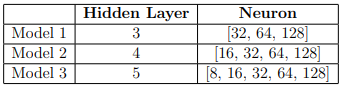

In [ ]:
batch_size = 32
lr = 0.001
epoch = 50

#### b.1 Model 1

Train model 1 seperti pada ketentuan yang sudah tertera. Lakukan juga proses testing.

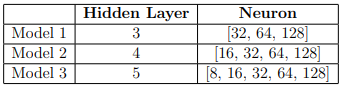

In [ ]:
model1 = Sequential([Flatten(),
                     Dense(32, activation='relu'),
                     Dense(64, activation='relu'),
                     Dense(128, activation='relu'),
                     Dense(2, activation='softmax')
                     ])
model1.compile(optimizer = Adam(learning_rate=lr),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history1 = model1.fit(x_train,
                      y_train,
                      epochs=epoch,
                      batch_size=batch_size,
                      validation_data = (x_val, y_val))

Epoch 1/50
23/23 [==============================] - 3s 105ms/step - loss: 3.8240 - accuracy: 0.5202 - val_loss: 0.7362 - val_accuracy: 0.4951
Epoch 2/50
23/23 [==============================] - 2s 90ms/step - loss: 1.7071 - accuracy: 0.5869 - val_loss: 0.4791 - val_accuracy: 0.8058
Epoch 3/50
23/23 [==============================] - 2s 89ms/step - loss: 1.0917 - accuracy: 0.6370 - val_loss: 0.5795 - val_accuracy: 0.7864
Epoch 4/50
23/23 [==============================] - 2s 80ms/step - loss: 0.4172 - accuracy: 0.8178 - val_loss: 0.3531 - val_accuracy: 0.8447
Epoch 5/50
23/23 [==============================] - 2s 95ms/step - loss: 0.3284 - accuracy: 0.8512 - val_loss: 0.5045 - val_accuracy: 0.7864
Epoch 6/50
23/23 [==============================] - 2s 97ms/step - loss: 0.3486 - accuracy: 0.8373 - val_loss: 0.3481 - val_accuracy: 0.8350
Epoch 7/50
23/23 [==============================] - 2s 94ms/step - loss: 0.2352 - accuracy: 0.9054 - val_loss: 0.2949 - val_accuracy: 0.8641
Epoch 8/50
2

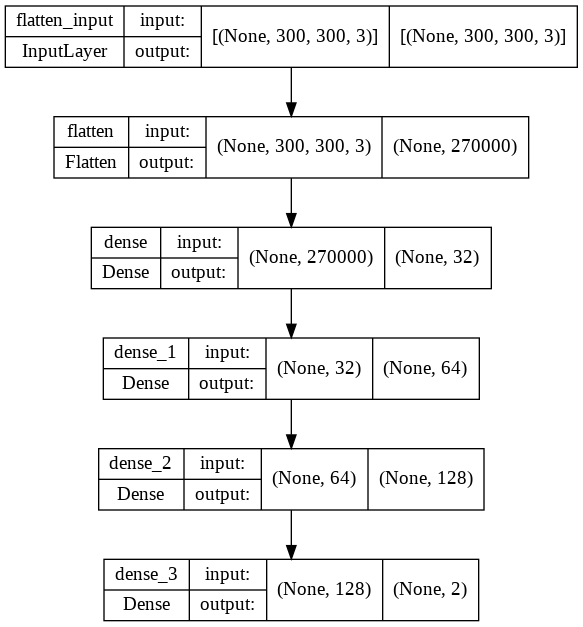

In [ ]:
plot_model(model1, to_file='model1_plot.png', show_shapes=True, show_layer_names=True)

Plot Loss

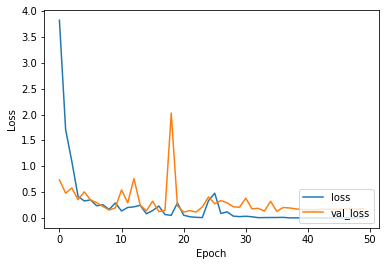

In [ ]:
plt.plot(history1.history['loss'], label='loss')
plt.plot(history1.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

Plot Accuracy

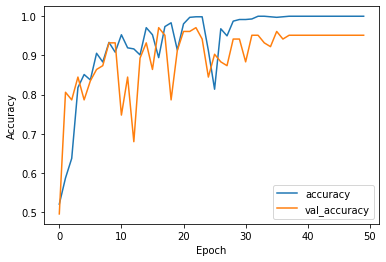

In [ ]:
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Proses testing Model_1

In [ ]:
# Testing
y_pred =  model1.predict(x_test)
y_pred = np.argmax(y_pred, axis=-1)

In [ ]:
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1])

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1])

Note: 0 is horse and 1 is human



Text(0.5, 1.0, "It's a horse")

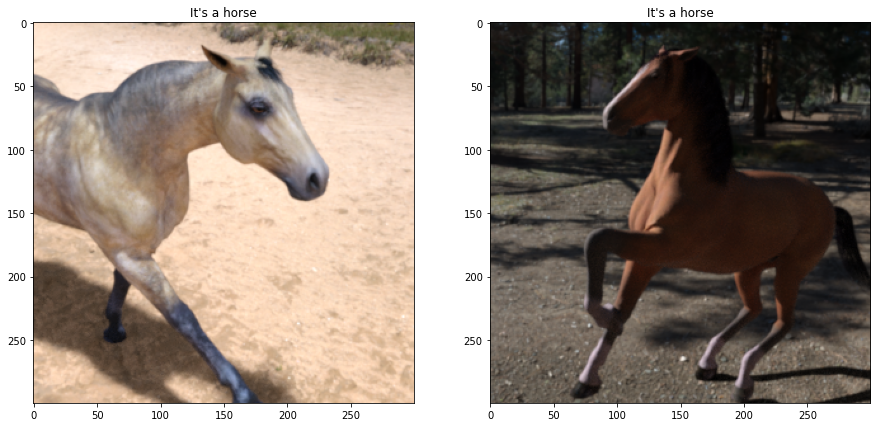

In [ ]:
print('Note: 0 is horse and 1 is human\n')

labels = ['horse','human']
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))

ax1.imshow(x_test[1])
ax1.set_title("It's a " +labels[int((y_pred[1]))])
ax2.imshow(x_test[100])
ax2.set_title("It's a " +labels[int((y_pred[100]))])

#### c.1 Evaluasi model 1 menggunakan akurasi, sensitivity, specificity dan F1 score.

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

[[ 84  13]
 [  1 107]]


In [ ]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Model 1 : %f' % accuracy)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Sensitivity (Recall) Model 1 : %f' % recall)
# specificity : tn / (tn+fp)
specificity = TN / (TN + FP)
print('Specificity Model 1 : %f' % specificity)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score Model 1 : %f' % f1)

Accuracy Model 1 : 0.931707
Sensitivity (Recall) Model 1 : 0.990741
Specificity Model 1 : 0.865979
F1 score Model 1 : 0.938596


#### d.1 Hasil diskusi dari model 1

- Untuk model 1, jika dilihat berdasarkan plot accuracy, pada rentang epoch 10 sampai 25, accuracy dari model cenderung belum stabil, dan mulai menunjukkan kestabilan saat epoch ke 40 dan seterusnya. Akan tetapi model cenderung overfit

- Dan berdasarkan output evaluasi model, maka dapat disimpulkan bahwa model 1 merupakan model yang cukup baik jika dibandingkan dengan model 2 dan model 3, karena: hasil keseluruhan matriks evaluasi yaitu accuracy, sensitivity, specificity dan F1 score menghasilkan nilai yang cukup tinggi.

#### b.2 Model 2

Train model 2 seperti pada ketentuan yang sudah tertera. Lakukan juga proses testing.

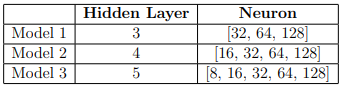

In [ ]:
model2 = Sequential([Flatten(),
                     Dense(16, activation='relu'),
                     Dense(32, activation='relu'),
                     Dense(64, activation='relu'),
                     Dense(128, activation='relu'),
                     Dense(2, activation='softmax')
                     ])

model2.compile(optimizer = Adam(learning_rate=lr),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history2 = model2.fit(x_train,
                      y_train,
                      epochs=epoch,
                      batch_size=batch_size,
                      validation_data = (x_val, y_val))

Epoch 1/50
23/23 [==============================] - 2s 83ms/step - loss: 4.2797 - accuracy: 0.5327 - val_loss: 9.4248 - val_accuracy: 0.4078
Epoch 2/50
23/23 [==============================] - 2s 71ms/step - loss: 2.9655 - accuracy: 0.5146 - val_loss: 0.6617 - val_accuracy: 0.5534
Epoch 3/50
23/23 [==============================] - 2s 72ms/step - loss: 0.5113 - accuracy: 0.7357 - val_loss: 0.5429 - val_accuracy: 0.7087
Epoch 4/50
23/23 [==============================] - 2s 72ms/step - loss: 0.3898 - accuracy: 0.8150 - val_loss: 0.2942 - val_accuracy: 0.8835
Epoch 5/50
23/23 [==============================] - 2s 71ms/step - loss: 0.4139 - accuracy: 0.8067 - val_loss: 0.8205 - val_accuracy: 0.5243
Epoch 6/50
23/23 [==============================] - 2s 74ms/step - loss: 0.3501 - accuracy: 0.8595 - val_loss: 0.2209 - val_accuracy: 0.9126
Epoch 7/50
23/23 [==============================] - 2s 70ms/step - loss: 0.2058 - accuracy: 0.9193 - val_loss: 0.2009 - val_accuracy: 0.9320
Epoch 8/50
23

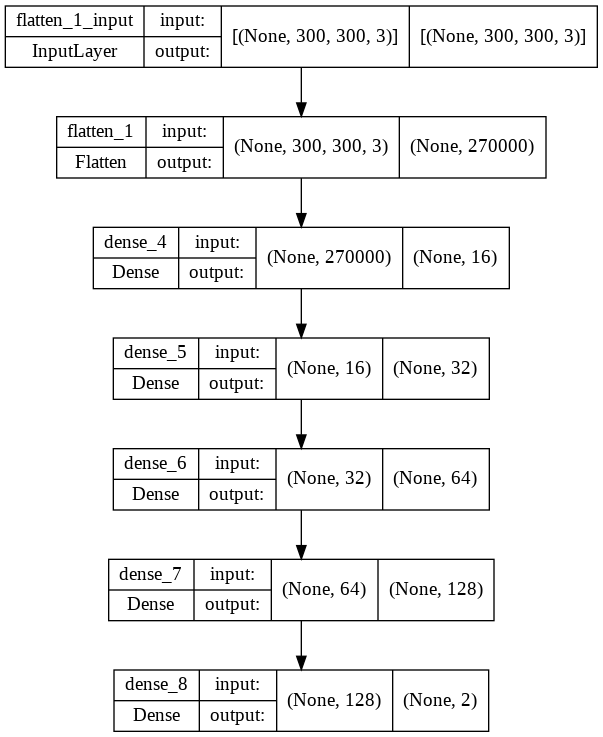

In [ ]:
plot_model(model2, to_file='model1_plot.png', show_shapes=True, show_layer_names=True)

Plot Loss

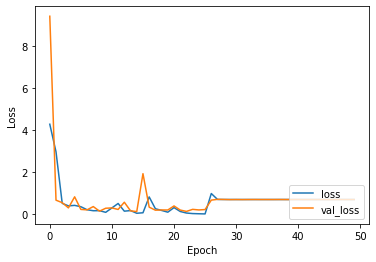

In [ ]:
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

Plot Accuracy

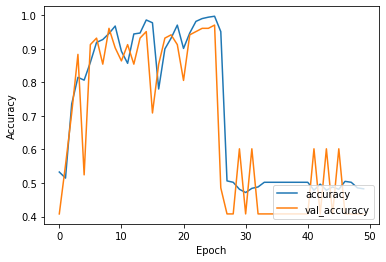

In [ ]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Proses testing.

In [ ]:
# Testing
y_pred =  model2.predict(x_test)
y_pred = np.argmax(y_pred, axis=-1)

Note: 0 is horse and 1 is human



Text(0.5, 1.0, "It's a horse")

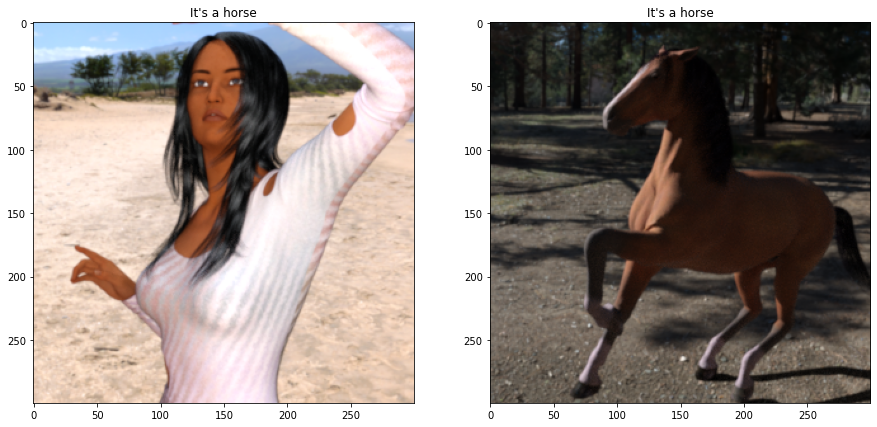

In [ ]:
print('Note: 0 is horse and 1 is human\n')

labels = ['horse','human']
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))

ax1.imshow(x_test[10])
ax1.set_title("It's a " +labels[int((y_pred[10]))])
ax2.imshow(x_test[100])
ax2.set_title("It's a " +labels[int((y_pred[100]))])

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1])

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

#### c.2 Evaluasi model 2 menggunakan akurasi, sensitivity, specificity dan F1 score.

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

[[ 97   0]
 [108   0]]


In [ ]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Model 2 : %f' % accuracy)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Sensitivity (Recall) Model 2 : %f' % recall)
# specificity : tn / (tn+fp)
specificity = TN / (TN + FP)
print('Specificity Model 2 : %f' % specificity)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score Model 2 : %f' % f1)

Accuracy Model 2 : 0.473171
Sensitivity (Recall) Model 2 : 0.000000
Specificity Model 2 : 1.000000
F1 score Model 2 : 0.000000


#### d.2 Hasil diskusi model 2.

Untuk model 2, 
- Pada bagian output plot nilai accuracy, dapat dilihat bahwa pada epoch 25 sampai seterusnya, akurasi dari model mengalami penurunan yang cukup tajam.

- Dan jika dilihat berdasarkan output hasil evaluasi model, dapat disimpulkan bahwa, model kurang bisa memprediksi data dengan baik. Hal tersebut terbukti dengan nilai akurasi yang hanya menunjukkan angka 47.31%, kemudian nilai sensitivity (recall), F1 yang menunjukkan angka 0.

#### b.3 Model 3

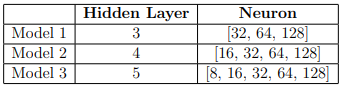

In [ ]:
model3 = Sequential([Flatten(),
                     Dense(8, activation='relu'),
                     Dense(16, activation='relu'),
                     Dense(32, activation='relu'),
                     Dense(64, activation='relu'),
                     Dense(128, activation='relu'),
                     Dense(2, activation='softmax')
                     ])

model3.compile(optimizer = Adam(learning_rate=lr),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history3 = model3.fit(x_train,
                      y_train,
                      epochs=epoch,
                      batch_size=batch_size,
                      validation_data = (x_val, y_val))

Epoch 1/50
23/23 [==============================] - 2s 73ms/step - loss: 1.5529 - accuracy: 0.4729 - val_loss: 0.7045 - val_accuracy: 0.4078
Epoch 2/50
23/23 [==============================] - 1s 62ms/step - loss: 0.7517 - accuracy: 0.5229 - val_loss: 1.1024 - val_accuracy: 0.4078
Epoch 3/50
23/23 [==============================] - 1s 61ms/step - loss: 0.7916 - accuracy: 0.5104 - val_loss: 0.6816 - val_accuracy: 0.5922
Epoch 4/50
23/23 [==============================] - 1s 61ms/step - loss: 0.7110 - accuracy: 0.4910 - val_loss: 0.7136 - val_accuracy: 0.4078
Epoch 5/50
23/23 [==============================] - 1s 61ms/step - loss: 0.7494 - accuracy: 0.4937 - val_loss: 0.7438 - val_accuracy: 0.4078
Epoch 6/50
23/23 [==============================] - 1s 61ms/step - loss: 0.7009 - accuracy: 0.5007 - val_loss: 0.6734 - val_accuracy: 0.5922
Epoch 7/50
23/23 [==============================] - 1s 61ms/step - loss: 0.6994 - accuracy: 0.5174 - val_loss: 0.7578 - val_accuracy: 0.4078
Epoch 8/50
23

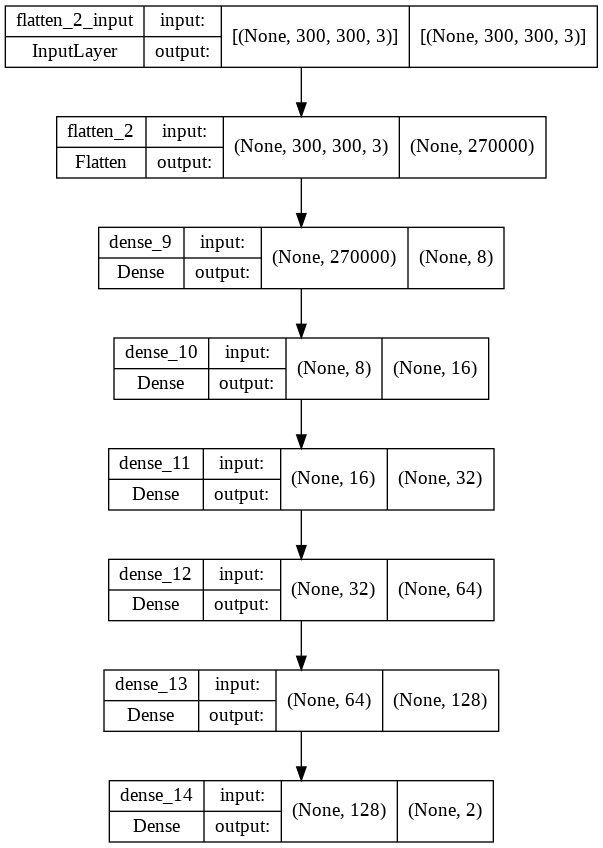

In [ ]:
plot_model(model3, to_file='model1_plot.png', show_shapes=True, show_layer_names=True)

Plot Loss

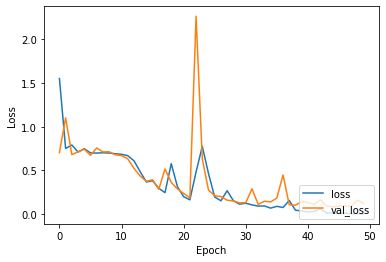

In [ ]:
plt.plot(history3.history['loss'], label='loss')
plt.plot(history3.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

Plot Accuracy

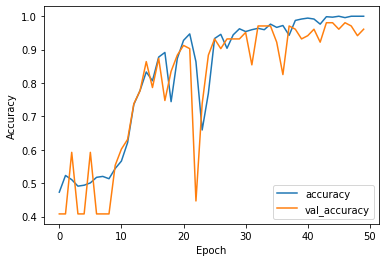

In [ ]:
plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Proses testing.

In [ ]:
# Testing
y_pred =  model3.predict(x_test)
y_pred = np.argmax(y_pred, axis=-1)

Note: 0 is horse and 1 is human



Text(0.5, 1.0, "It's a horse")

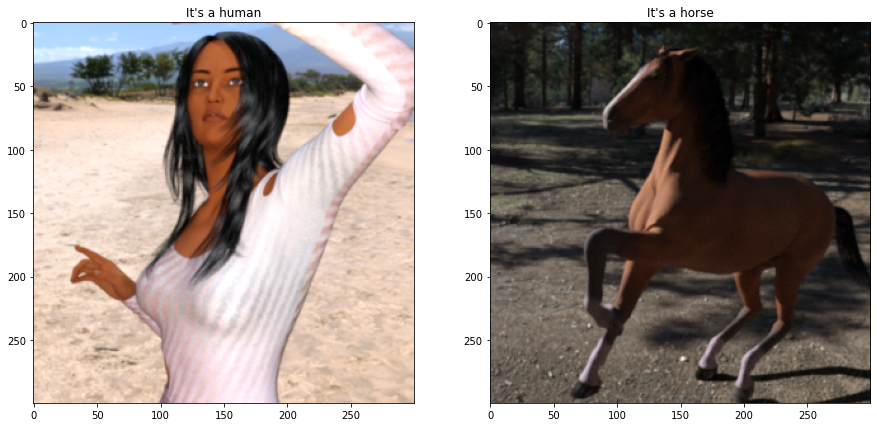

In [ ]:
print('Note: 0 is horse and 1 is human\n')

labels = ['horse','human']
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))

ax1.imshow(x_test[10])
ax1.set_title("It's a " +labels[int((y_pred[10]))])
ax2.imshow(x_test[100])
ax2.set_title("It's a " +labels[int((y_pred[100]))])

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1])

In [ ]:
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1])

#### c.3 Evaluasi model 3 menggunakan akurasi, sensitivity, specificity dan F1 score.

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

[[ 86  11]
 [  1 107]]


In [ ]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Model 3 : %f' % accuracy)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Sensitivity (Recall) Model 3 : %f' % recall)
# specificity : tn / (tn+fp)
specificity = TN / (TN + FP)
print('Specificity Model 3 : %f' % specificity)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score Model 3 : %f' % f1)

Accuracy Model 3 : 0.941463
Sensitivity (Recall) Model 3 : 0.990741
Specificity Model 3 : 0.886598
F1 score Model 3 : 0.946903


#### d.3 Hasil diskusi dari model 3.

Pada model 3,
- Pada bagian output plot nilai accuracy, dapat dilihat bahwa pada epoch 0 sampai (sekitar) 12, akurasi dari model cenderung rendah dan mengalami peningkatan pada nilai epoch 12 dan seterusnya.

- Dan jika dilihat berdasarkan output hasil evaluasi model, dapat disimpulkan bahwa, jika dibandingkan dengan hasil evaluasi model 2, model 3 terlihat cukup baik untuk bisa memprediksi data dengan benar.

References:
* https://jovian.ai/snehabanthia54/course-project-04